# Projet Machine Learning

## Analyse Descriptive Unidimensionnelle

In [1]:
import pandas as pd
import numpy as np
# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
path="/Users/hugoguilbot/VALDOM/INSA/Machine learning/Projet/global-data-on-sustainable-energy.csv"
energy=pd.read_csv(path,sep=",",header=0)
# Vérification du contenu
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
energy.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


##### Les types correspondants aux variables

In [4]:
print(energy.dtypes)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

##### Nombre de valeur manquante dans chaque colonne

In [5]:
print(energy.isnull().sum())

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

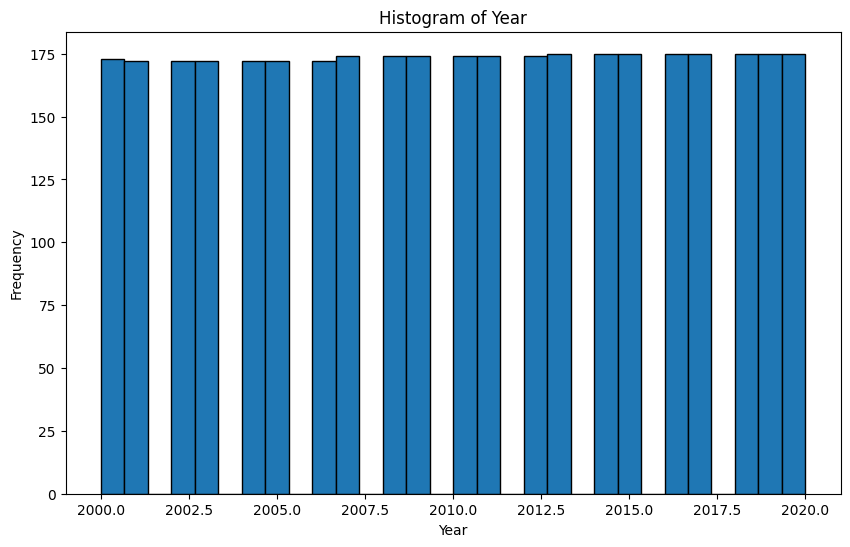

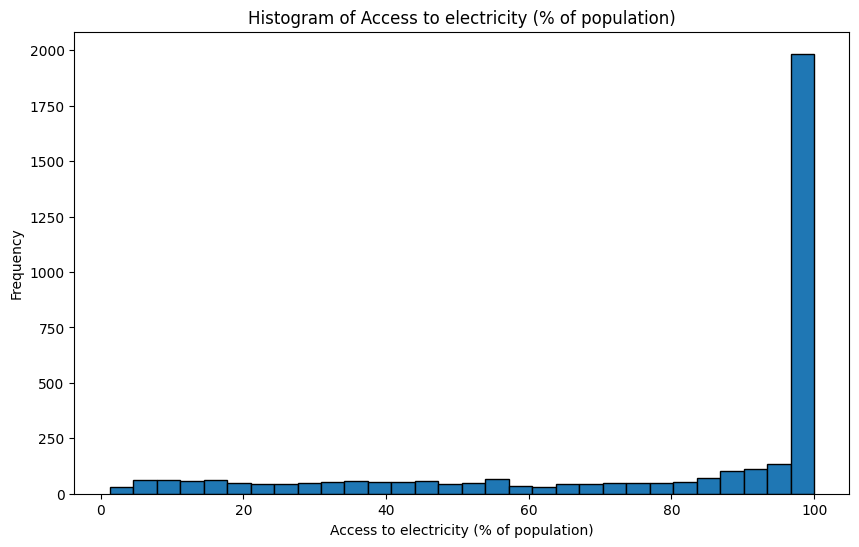

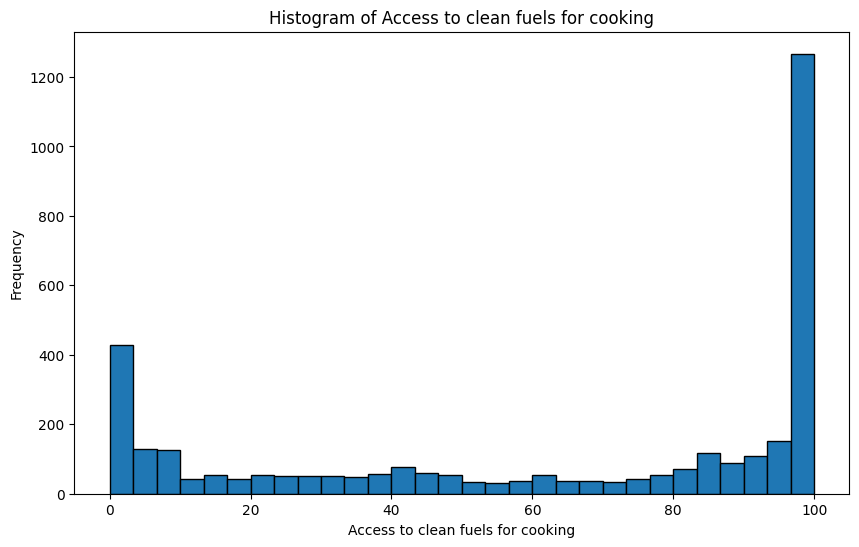

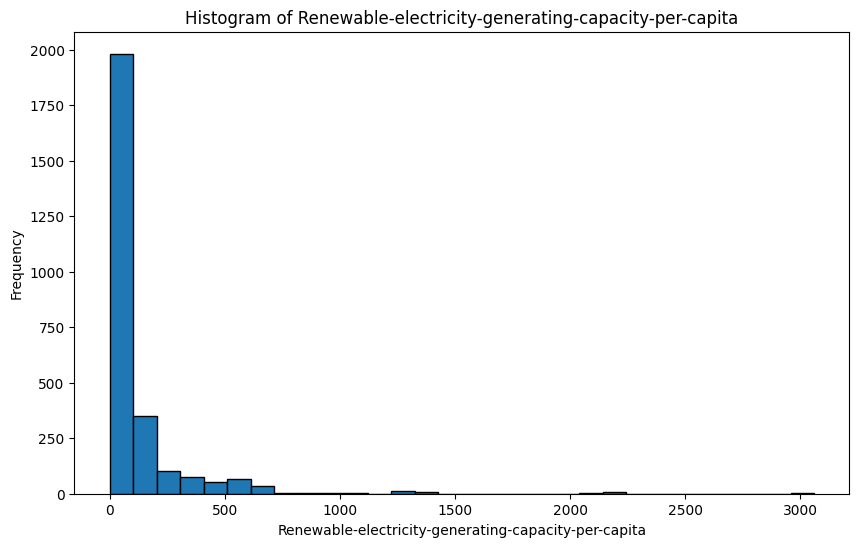

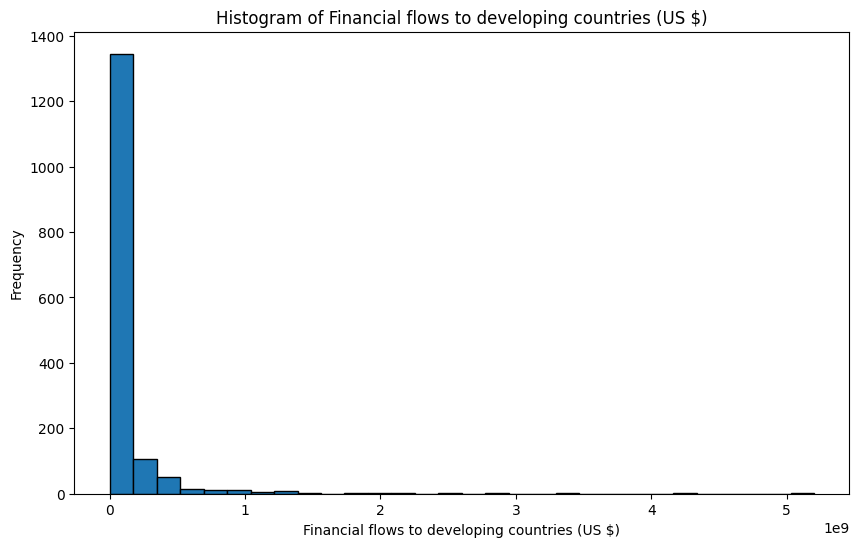

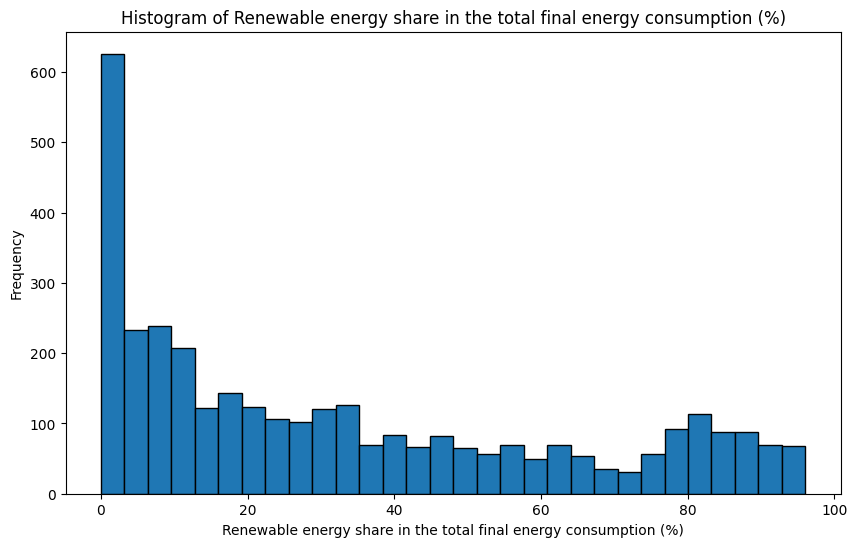

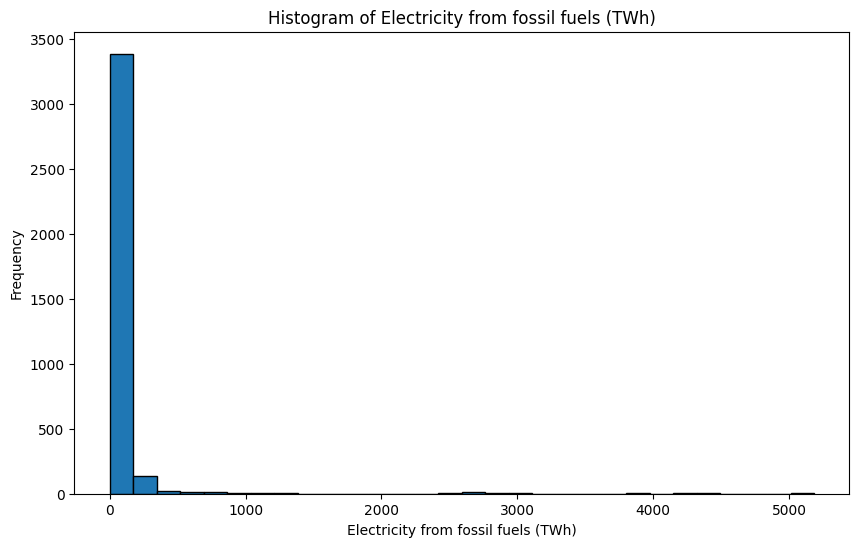

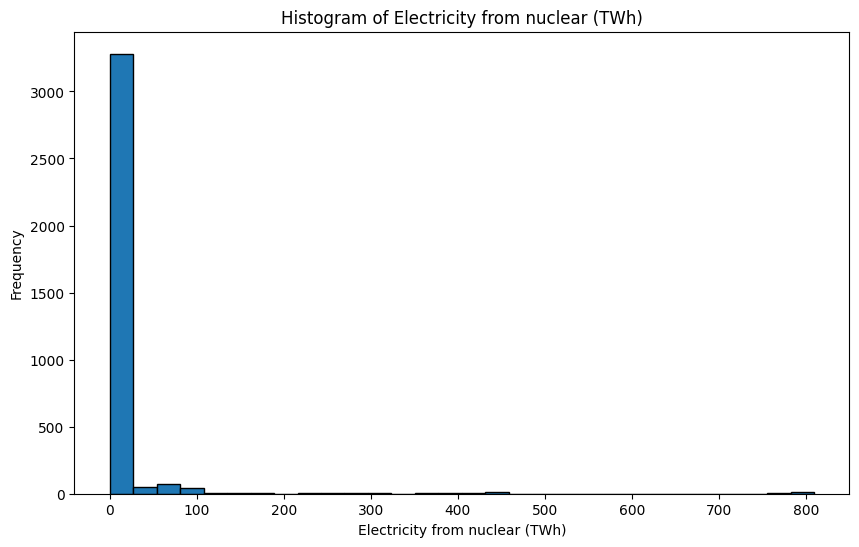

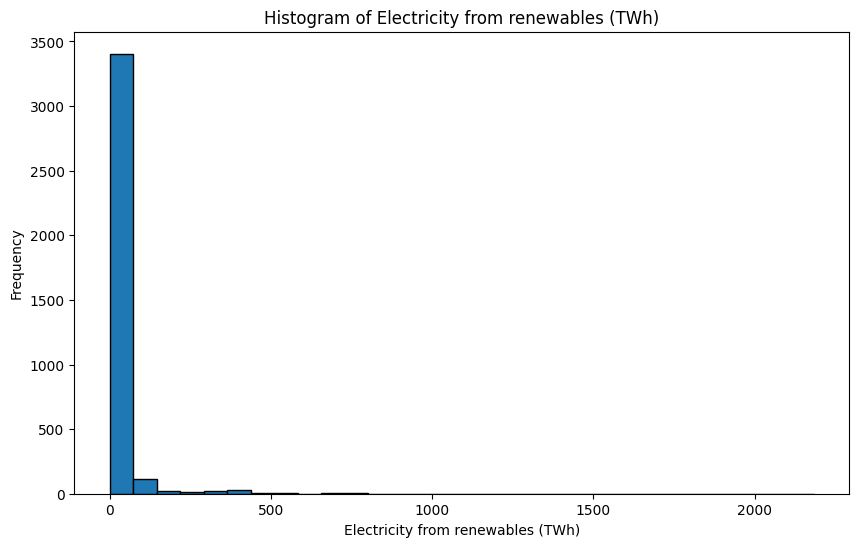

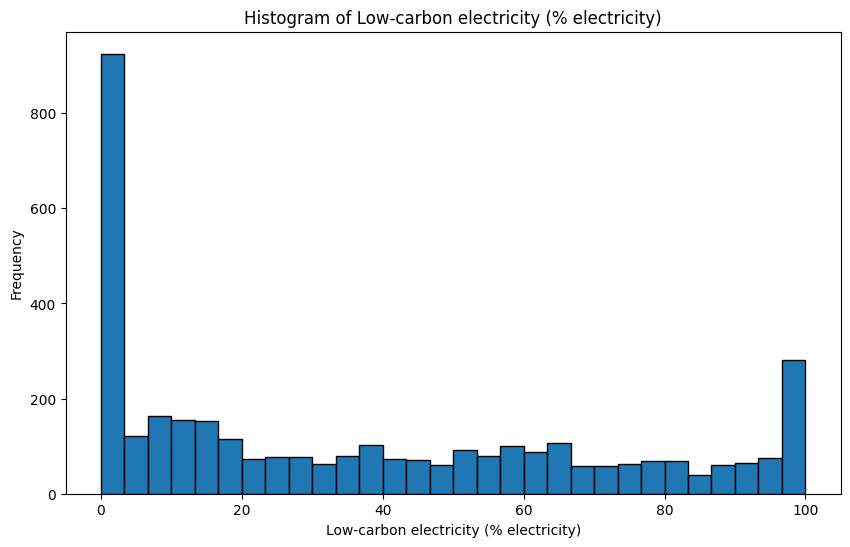

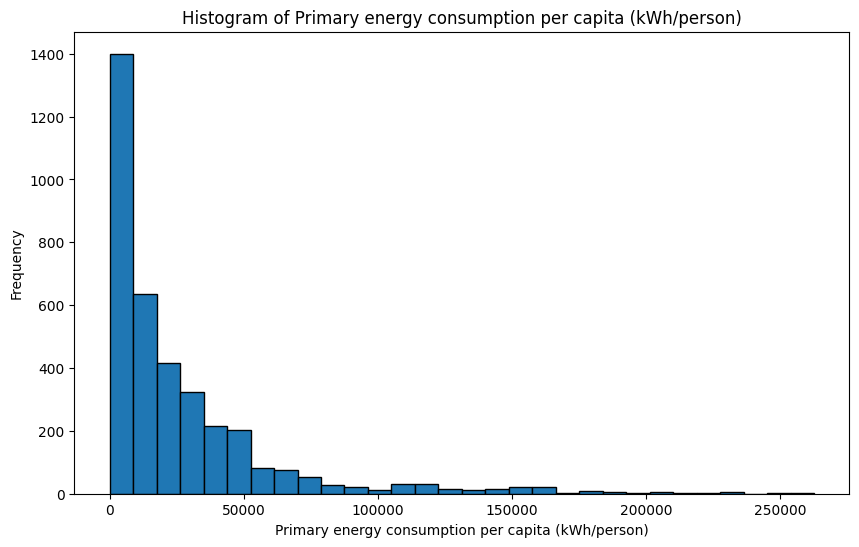

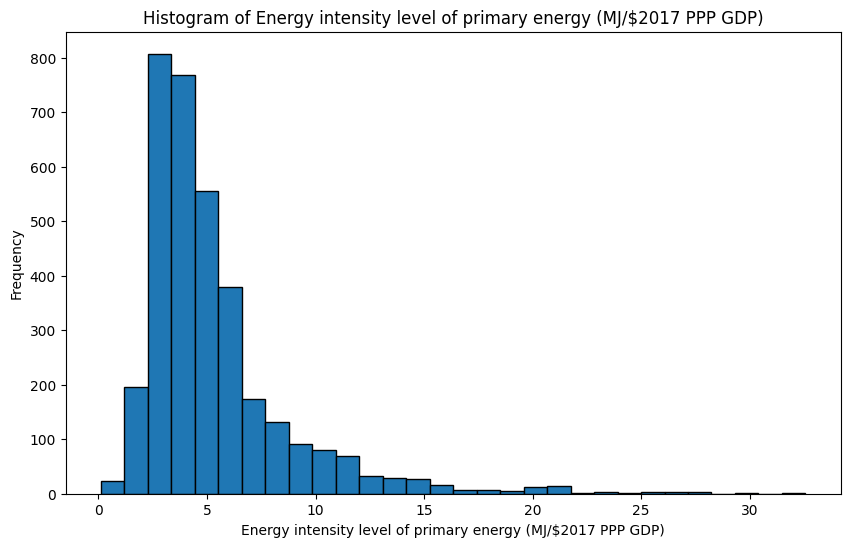

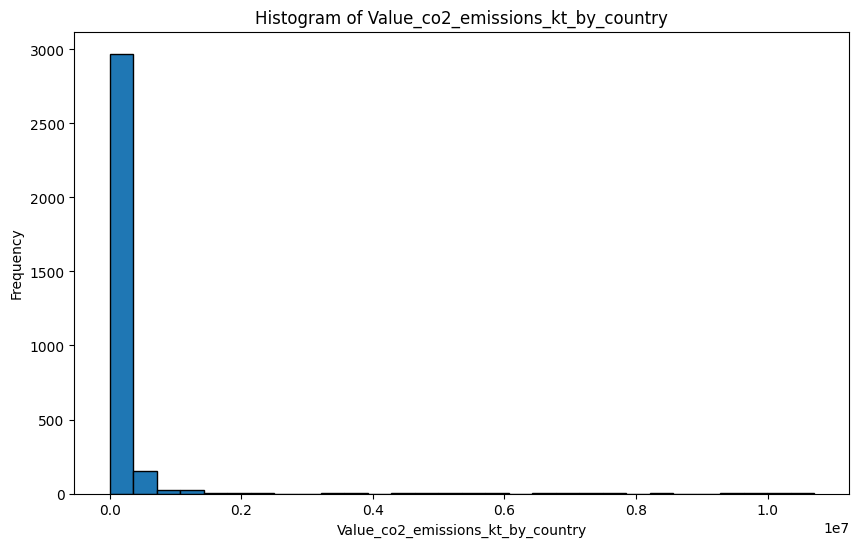

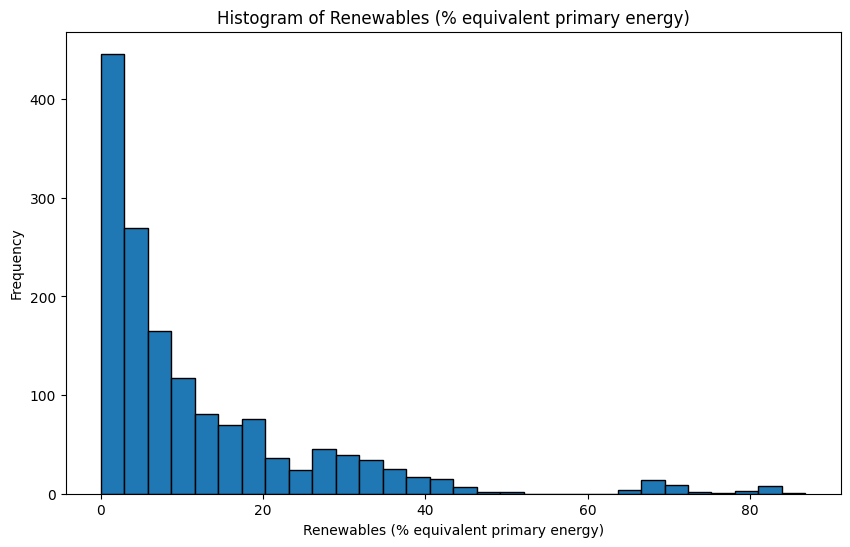

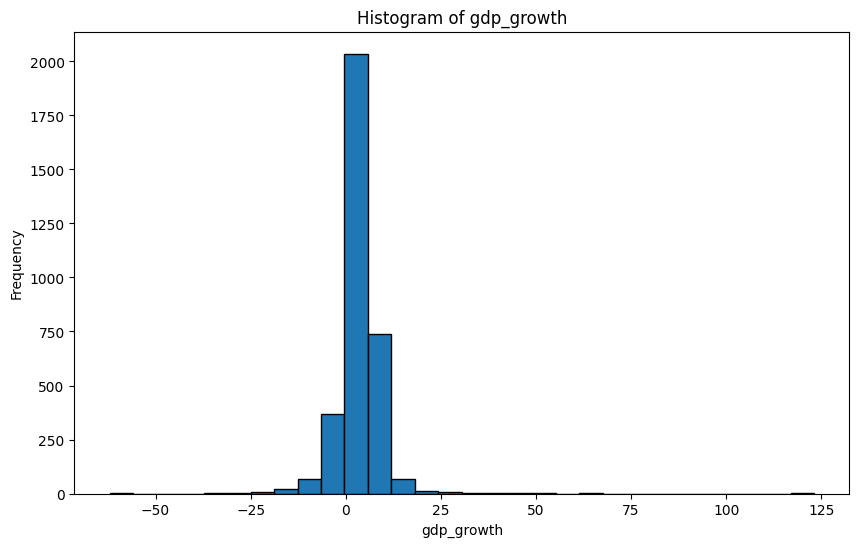

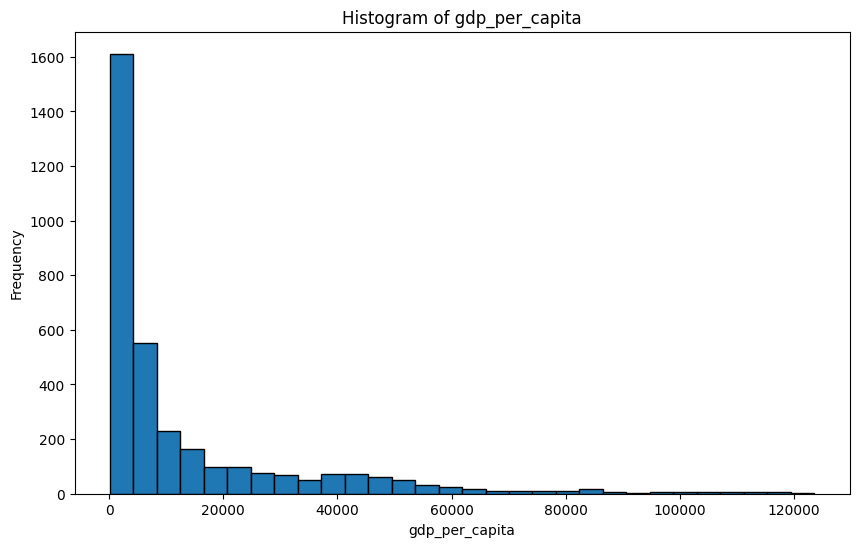

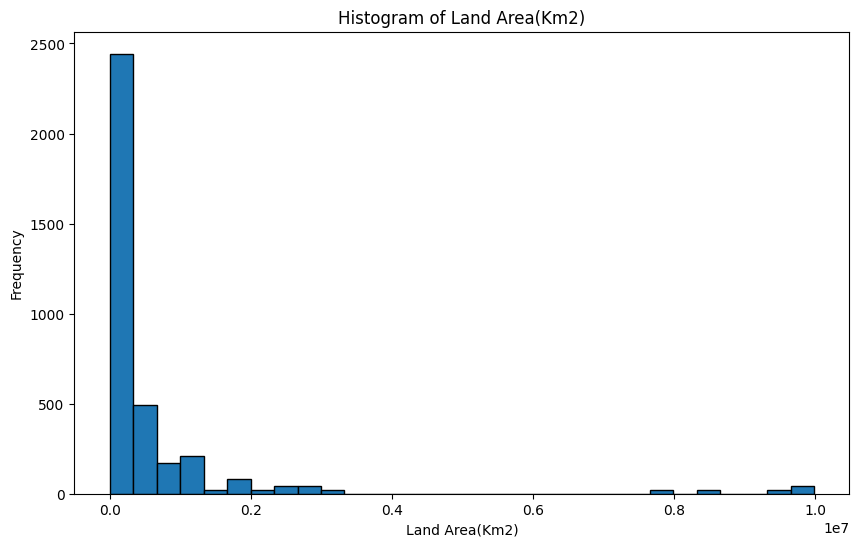

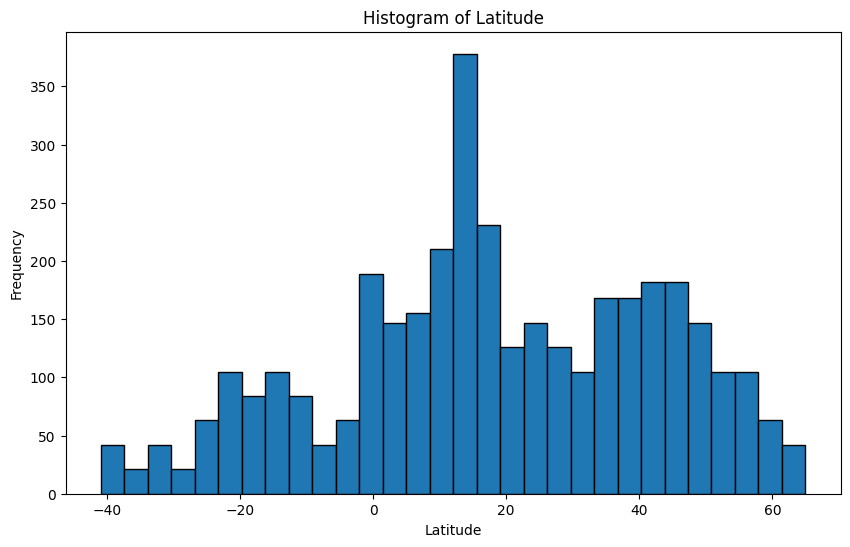

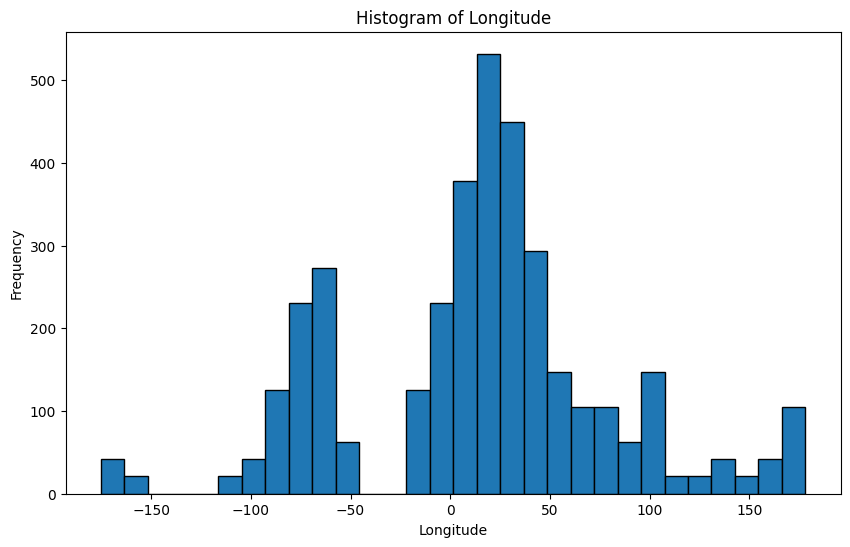

In [6]:
import matplotlib.pyplot as plt

# Récupération de tous les noms de colonnes dans une liste
all_columns = energy.columns.tolist()

# Exclusion de la première et de la dix-huitième colonne
# Notez que l'indexation commence à 0, donc la première colonne est à l'index 0 et la dix-huitième à l'index 17
selected_columns = all_columns[1:17] + all_columns[18:]

# Créer un histogramme pour chaque variable numérique
for col in selected_columns:
    plt.figure(figsize=(10, 6))  # Ajuste la taille du graphique
    plt.hist(energy[col].dropna(), bins=30, edgecolor='k')  # Gère les valeurs manquantes et définit le nombre de bins
    plt.title(f'Histogram of {col}')  # Ajoute un titre
    plt.xlabel(col)  # Ajoute une étiquette pour l'axe des x
    plt.ylabel('Frequency')  # Ajoute une étiquette pour l'axe des y
    plt.show()

## Transformation des variables

Des transformations des variables quantitatives vous semblent-t-elles pertinentes ?
N.B. Curieusement, la variable Density (P/Km2) n’est pas considérée comme une variable numérique, convertissez-là en une variable numérique. Convertissez la variable Year en une variable qualitative.

1) transformation de la densité en valeur numérique

In [7]:
all_columns = energy.columns.tolist()

title_Density = all_columns[17]
energy[title_Density] = pd.to_numeric(energy[title_Density], errors='coerce')


2) Transformation de l'année en valeur quantitative

In [8]:
energy['Year'] = energy['Year'].astype(str)

3. Visualisation des nouveaux types de données

In [9]:
print(energy.dtypes)

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

### Visualisation

Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. 

Quels sont les 5 pays les plus émetteurs de CO2 ?

In [10]:
# Groupement par 'Entity' et calcul de la somme totale des émissions de CO2
total_co2_emissions = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
# Tri des pays par émissions totales de CO2
top_emitters = total_co2_emissions.sort_values(ascending=False).head(5)
print(total_co2_emissions)
print(top_emitters)

Entity
Afghanistan            8.146000e+04
Albania                8.606000e+04
Algeria                2.398420e+06
Angola                 4.337900e+05
Antigua and Barbuda    1.026000e+04
                           ...     
Uzbekistan             2.368540e+06
Vanuatu                2.460000e+03
Yemen                  0.000000e+00
Zambia                 7.118000e+04
Zimbabwe               2.208000e+05
Name: Value_co2_emissions_kt_by_country, Length: 176, dtype: float64
Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: Value_co2_emissions_kt_by_country, dtype: float64


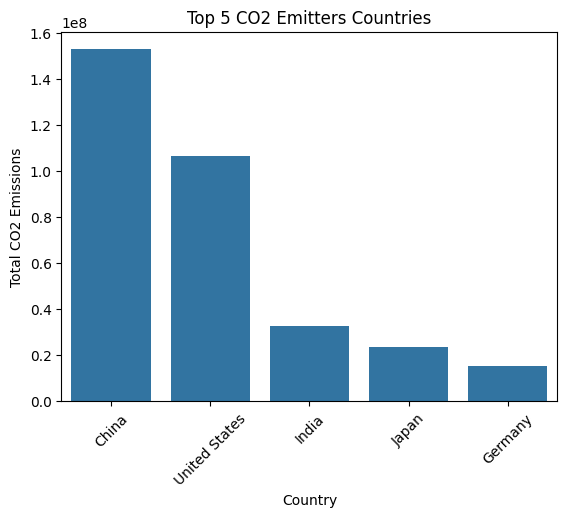

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un graphique à barres pour les 5 principaux émetteurs
sns.barplot(x=top_emitters.index, y=top_emitters.values)
plt.title('Top 5 CO2 Emitters Countries')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


## Valeurs manquantes

1. Déterminer le taux de valeurs manquantes pour chaque variable.

In [17]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = energy.isnull().mean() * 100

# Affichage du pourcentage de valeurs manquantes
print(missing_values_percentage)


Entity                                                               0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Primary energy consumption per capita (kWh/person)                   0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)     

 Les éléments avec le plus grand taux de valeurs manquantes sont Renewables (% equivalent primary energy), Financial flows to developing countries (US $),Renewable-electricity-generating-capacity-per-capita  ,Value_co2_emissions_kt_by_country et Energy intensity level of primary energy (MJ/$2017 PPP GDP).

 2. On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im- portant : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US Dollars) et Renewables (% equivalent primary energy).

In [19]:
# Suppression des colonnes spécifiées
columns_to_drop = ['Renewable-electricity-generating-capacity-per-capita', 
                   'Financial flows to developing countries (US $)', 
                   'Renewables (% equivalent primary energy)']

energy.drop(columns=columns_to_drop, inplace=True)

## Analyse descriptive multidimensionnelle

Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation : par exemple scatterplot, correlation plot ... Analysez les dépendances entre les variables quantitatives.

In [20]:
print(energy.dtypes)

Entity                                                               object
Year                                                                 object
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

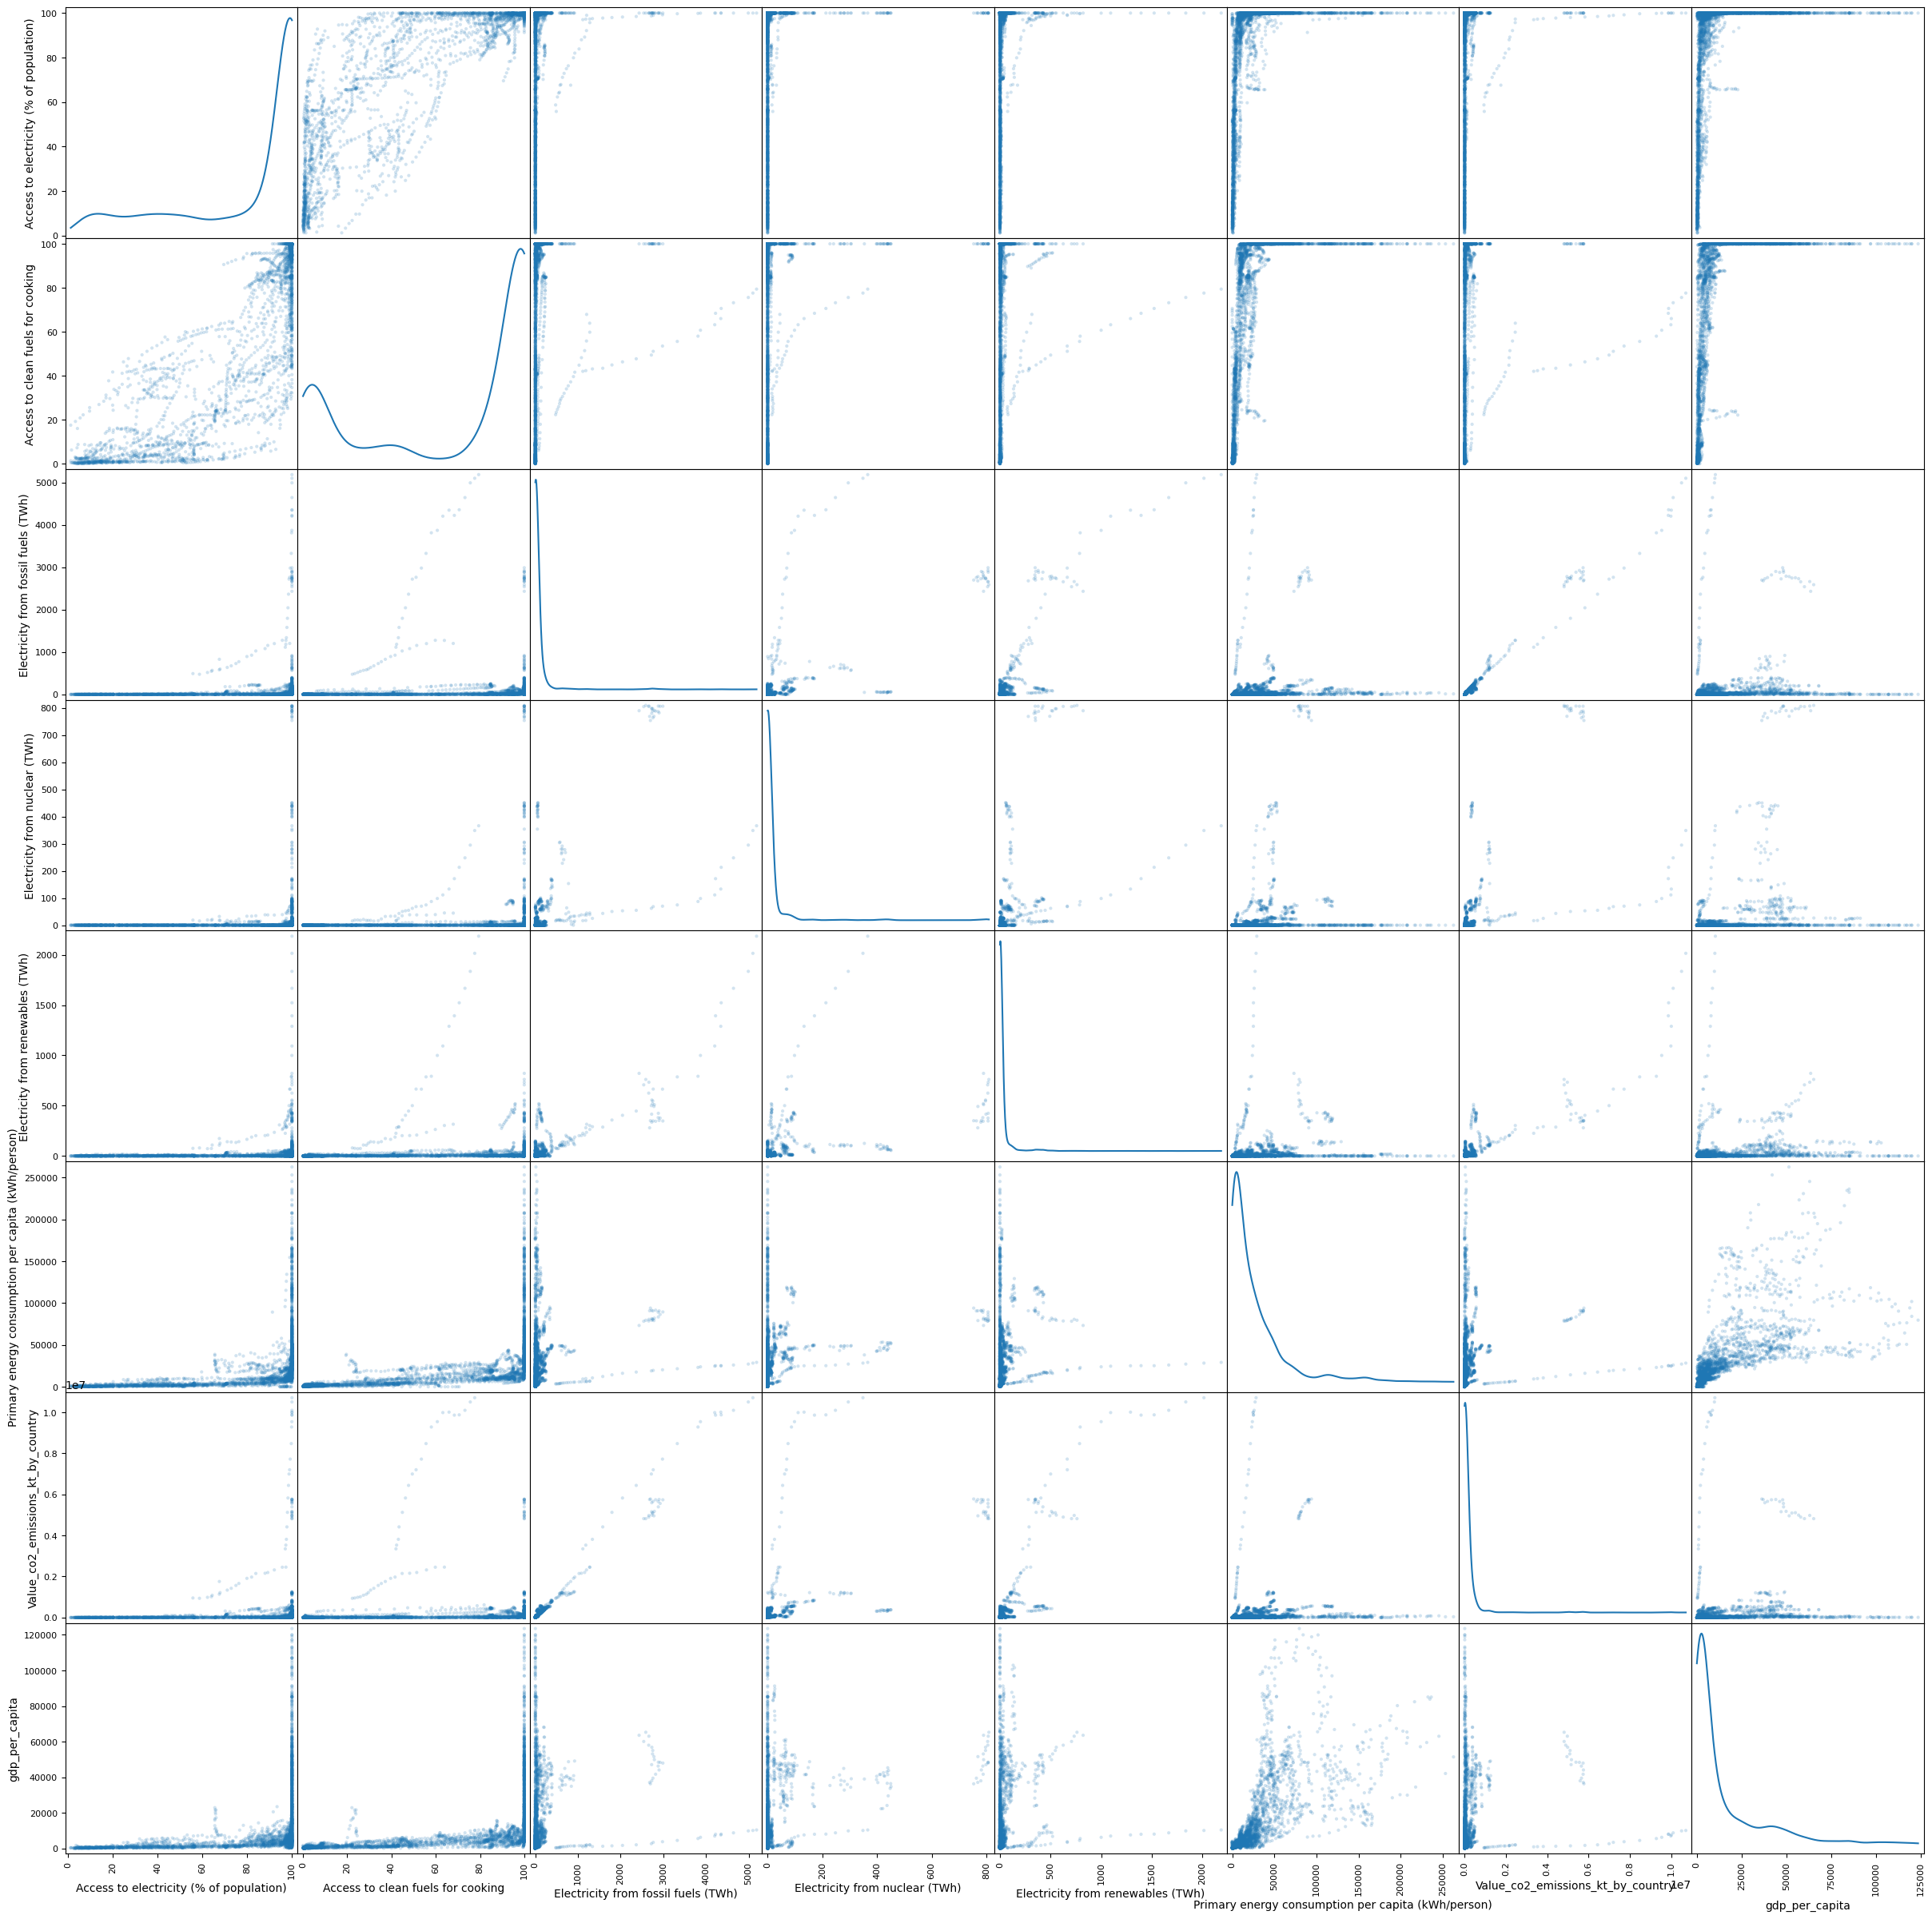

In [30]:
# scatter plot matrix des variables quantitatives
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

selected_columns = ['Access to electricity (% of population)', 
                    'Access to clean fuels for cooking', 
                    'Electricity from fossil fuels (TWh)',
                    'Electricity from nuclear (TWh)', 
                    'Electricity from renewables (TWh)',
                    'Primary energy consumption per capita (kWh/person)',
                    'Value_co2_emissions_kt_by_country',
                    'gdp_per_capita'
                    ] 

scatter_matrix(energy[selected_columns], alpha=0.2, 
               figsize=(30, 30), diagonal='kde')
plt.show()

La relation croissante entre les value CO2 emission kt by country (émissions de CO2 par pays en kilotonnes) et electricity from fossil fuels (TWh) (électricité produite à partir de combustibles fossiles en térawattheures), cela suggère une corrélation positive entre ces deux variables. Cela signifie que, généralement, plus un pays produit d'électricité à partir de combustibles fossiles, plus ses émissions de CO2 tendent à être élevées.
(Ce qui paraît logique)

## Analyse en composantes principales

Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats.

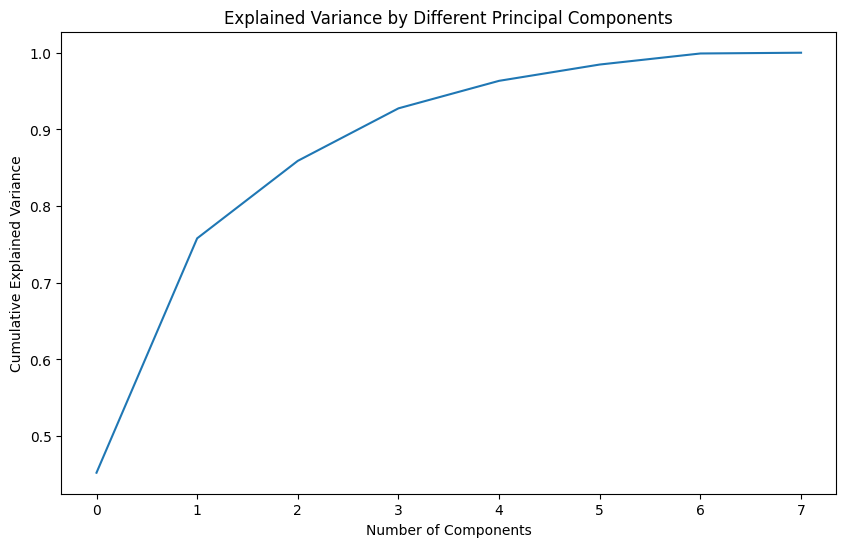

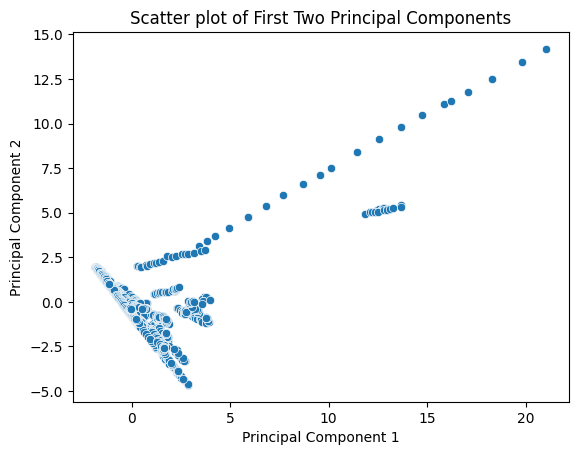

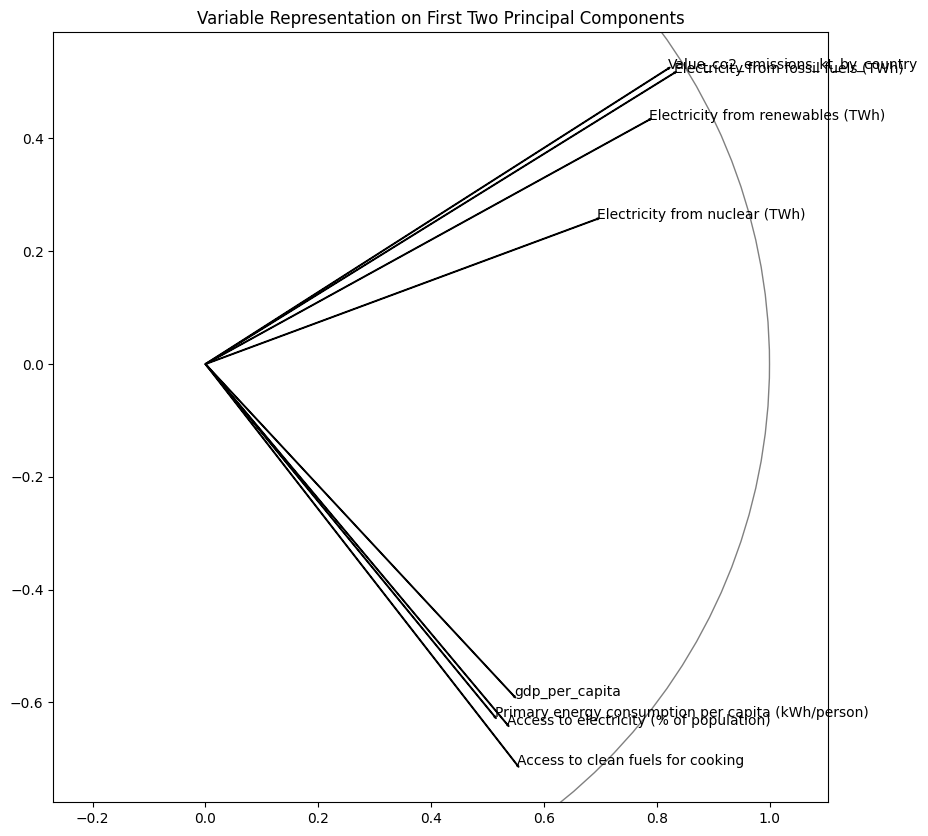

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes pour l'ACP
selected_columns = ['Access to electricity (% of population)', 
                    'Access to clean fuels for cooking', 
                    'Electricity from fossil fuels (TWh)',
                    'Electricity from nuclear (TWh)', 
                    'Electricity from renewables (TWh)',
                    'Primary energy consumption per capita (kWh/person)',
                    'Value_co2_emissions_kt_by_country',
                    'gdp_per_capita'] 

# Préparation des données : élimination des valeurs manquantes et normalisation
data_for_pca = energy[selected_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)


# Application de l'ACP
pca = PCA()
pca_results = pca.fit_transform(scaled_data)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Création d'un DataFrame pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(len(selected_columns))])

# Visualisation de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

# Affichage des deux premières composantes principales
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of First Two Principal Components')
plt.show()

# Affichage des coordonnées des variables sur les deux premières composantes principales
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

for i, j, nom in zip(coord1, coord2, selected_columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='black')

plt.axis('equal')
plt.title('Variable Representation on First Two Principal Components')
c = plt.Circle((0, 0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



## Dépendance entre variable Year et variable à prédire

Conversion de l'année en numérique

In [38]:
energy['Year'] = pd.to_numeric(energy['Year'])

Création du graphique pour comprendre l'évolution de l'émission de CO2 en fonction des années

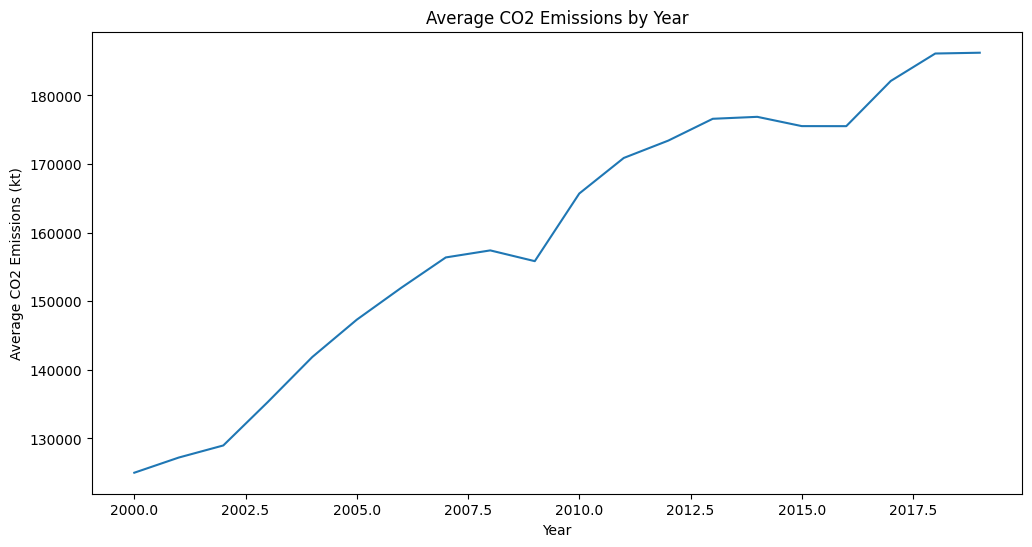

In [39]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne des émissions de CO2 par année
average_emissions_per_year = energy.groupby('Year')['Value_co2_emissions_kt_by_country'].mean()

# Création d'un graphique en ligne
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_emissions_per_year.index, y=average_emissions_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kt)')
plt.title('Average CO2 Emissions by Year')
plt.show()

